## TP 12

In [1]:
%matplotlib inline
from scipy.ndimage import sobel, gaussian_filter
from scipy import ndimage, misc
import scipy
import numpy as np
import imageio
import matplotlib.pyplot as plt
from PIL import Image
from time import sleep
from skimage.feature import peak_local_max
from skimage import measure

In [2]:
checker = imageio.imread('checkerboard.png')
checker = checker.astype('double')
sweden = imageio.imread('sweden_road.png')

In [3]:
"""
def checkerboard(nb_x=2, nb_y=2, s=10) :
    C = 255*np.kron ([[1, 0] * nb_x, [0, 1] * nb_x] * nb_y, np.ones(( s , s) ) )
    return C

#""""""
checkerboard generation
a grid of size 2∗nb_x by 2∗nb_y is generated
each square has s pixels .
"""



'\ndef checkerboard(nb_x=2, nb_y=2, s=10) :\n    C = 255*np.kron ([[1, 0] * nb_x, [0, 1] * nb_x] * nb_y, np.ones(( s , s) ) )\n    return C\n\n#\ncheckerboard generation\na grid of size 2∗nb_x by 2∗nb_y is generated\neach square has s pixels .\n'

Text(0.5, 1.0, 'Sobel Y')

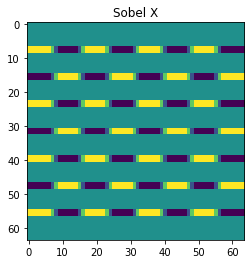

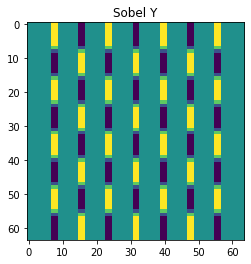

In [4]:
Ix, Iy = sobel(checker,axis=0), sobel(checker,axis=1)

plt.figure()
plt.imshow(Ix); plt.title('Sobel X')

plt.figure()
plt.imshow(Iy); plt.title('Sobel Y')

In [5]:
sigma = 3
M1, M2, M4 = np.multiply(Ix, Ix), np.multiply(Iy, Ix), np.multiply(Iy, Iy)
M1 = scipy.ndimage.gaussian_filter(M1, sigma)
M2 = scipy.ndimage.gaussian_filter(M2, sigma)
M4 = scipy.ndimage.gaussian_filter(M4, sigma)
#plt.imshow(M1)
#plt.imshow(M2)
#plt.imshow(M4)

$C = det - K \cdot Trace^2$  
where $Trace = M1 + M4 $, main diagonal and $0.04 \leq K \leq 0.15$

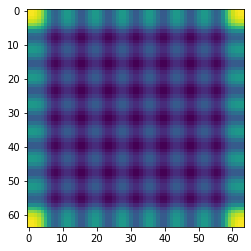

In [6]:
K = 0.55
C = (np.multiply(M1,M4) - np.multiply(M2,M2)) - K*(np.multiply((M1+M4),(M1+M4)))
plt.imshow(C)

<ipython-input-7-f3a14c65fe8d>:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  corners = peak_local_max(C, indices =False , min_distance=1)


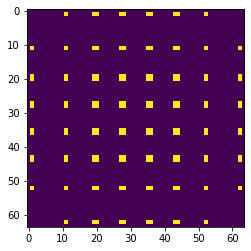

In [7]:
corners = peak_local_max(C, indices =False , min_distance=1)
plt.imshow(corners)

In [8]:
L = measure.label(corners)
props = measure.regionprops(L)
centers = []
for prop in props:
    centers.append(prop.centroid)


<ipython-input-9-162dad1a6fa8>:84: UserWarning: checkerboard.python.png is a low contrast image
  imsave('checkerboard.python.png', checker.astype('int'))
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-9-162dad1a6fa8>:61: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  corners = peak_local_max(C, indices=False, min_distance=2)


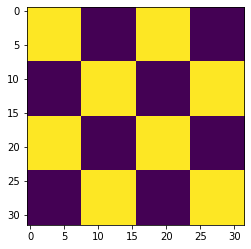

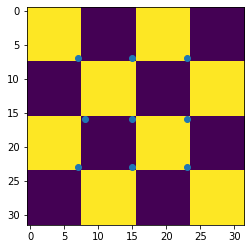

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-9-162dad1a6fa8>:61: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  corners = peak_local_max(C, indices=False, min_distance=2)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


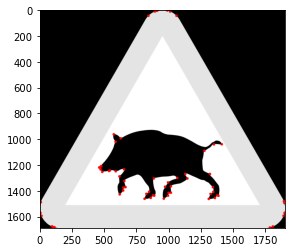

In [9]:
%matplotlib inline
# -*- coding: utf-8 -*-
"""
Created on Thu Nov  8 09:16:03 2018

Harris corner detector

@author: yann
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy
from skimage.io import imread, imsave
from skimage.feature import peak_local_max
from skimage import measure, exposure

from skimage.morphology import disk, dilation


def checkerboard(nb_x=2, nb_y=2, s=10):
    """
    checkerboard generation
    a grid of size 2*nb_x X 2*nb_y is generated
    each square has s pixels.
    """
    C = 255*np.kron([[1, 0] * nb_x, [0, 1] * nb_x] * nb_y, np.ones((s, s)))
    return C


def harris(I, K, sigma, t):
    """
    Harris corner detector
    I     : original grayscale image
    K     : coefficient
    sigma : scale of observation (gaussian filter size)
    t     : threshold value
    return values
    C     : Cornerness measure
    pts   : coordinates of the points

    """
    I = I.astype('double')
    Ix = scipy.ndimage.sobel(I, axis=0)
    Iy = scipy.ndimage.sobel(I, axis=1)
    M1 = Ix * Ix
    M2 = Iy * Ix
    M4 = Iy * Iy

    # gaussian filter
    M1 = scipy.ndimage.gaussian_filter(M1, sigma)
    M2 = scipy.ndimage.gaussian_filter(M2, sigma)
    M4 = scipy.ndimage.gaussian_filter(M4, sigma)

    # cornerness measure
    C = M1*M4 - M2*M2 - K * (M1+M4)*(M1+M4)
    C2 = C.copy()
    C[C < t] = 0

    # find local maxima
    corners = peak_local_max(C, indices=False, min_distance=2)
    L = measure.label(corners)
    props = measure.regionprops(L)
    centers = []
    for prop in props:
        centers.append(prop.centroid)

    # convert into np array
    centers = np.array(centers)

    # normalize C for saving image
    C2 = C2 - np.min(C2)
    C2 = C2 / np.max(C2)

    return C2, centers


##########################################################
# 1st test on checkerboard
K = 0.04
sigma = 1
t = 0
checker = checkerboard(nb_x=2, nb_y=2, s=8)
imsave('checkerboard.python.png', checker.astype('int'))
plt.imshow(checker)
cornerness, corners = harris(checker, K, sigma, t)
fig = plt.figure()
plt.imshow(checker)
plt.plot(corners[:, 1], corners[:, 0], 'o')
plt.show()
fig.savefig('harris_checker.python.pdf', bbox_inches='tight')
imsave('cornerness_checker.python.png', cornerness)


##########################################################
# %%
# sweden road sign
I = imread('sweden_road.png')
sigma = 3
t = 10**7
cornerness, corners = harris(I, K, sigma, t)
imsave('cornerness_swedenroad.python.png',
       exposure.equalize_adapthist(cornerness))
corners = corners.astype('int')

# for saving image result with detected corners in red
I2 = np.repeat(I[:, :, np.newaxis], 3, axis=2)
P = np.zeros(I.shape, dtype='uint8')

P[corners[:, 0], corners[:, 1]] = 255
SE = disk(10)
P = dilation(P, selem=SE)

I2[:, :, 0] = np.maximum(I2[:, :, 0], P)
I2[:, :, 1] = np.minimum(I2[:, :, 1], 255-P)

I2[:, :, 2] = np.minimum(I2[:, :, 2], 255-P)
plt.imshow(I2)
imsave('harris_swedenroad.python.png', I2)